Create an electronic report with a maximum of 2000 words (excluding citations) using Jupyter. The report should include the posed question, conducted analysis, and derived conclusion. Only one team member needs to submit this report. It is not required to include all tasks completed by each group member in their individual assignments. Make sure to reach a consensus among all team members on the final content of the report. If needed, consult your TA and Instructor for further guidance.

## Best Variables for Prediction for GitHub Stars

### Introduction

Start with relevant background information on the topic to prepare those unfamiliar for the rest of your proposal.

Formulate one or two questions for investigation and detail the dataset that will be utilized to address these questions.

Additionally, align your question/objectives with the existing literature. To contextualize your study, include a minimum of two scientific publications (these should be listed in the References section).

GitHub repositories are online platforms that are useful for coding projects and assignments. Repositories allow for collaboration with other GitHub users, as well as viewing opportunities for anyone interested in exploring topics of interest. Projects can vary based on content, coding language and size, just to name a few aspects. Furthermore, repository features allow for identifying popularity among repositories, something which will be of importance in our analysis. GitHub is a website that provides a graphical interface for version control using Git which allows developers to maintain their code and track the versions of their project as it progresses. Projects are hosted in repositories, which can be starred by GitHub users if they like them. Surveys confirm that stars are viewed by pratictioners as the most useful measure of a repository's popularity (Borges & Valente, 2018). As GitHub becomes more and more prevalent among developers for use in version control, it can be interesting to see what variables best predict popularity. Recent attempts have been made to solve this problem, such as Moid et. al. with a Random Forest regressor, but no research exists on using Ridge regression on this problem (2021). We will explore this below.

Our question will be the following:

**Which explanatory variables best predict stars on a GitHub repository?**

### Methods and Results

In this section, you will include:

a) “Exploratory Data Analysis (EDA)”

Demonstrate that the dataset can be read into R.
Clean and wrangle your data into a tidy format.
Plot the relevant raw data, tailoring your plot to address your question.
Make sure to explore the association of the explanatory variables with the response.
Any summary tables that are relevant to your analysis.
Be sure not to print output that takes up a lot of screen space.
Your EDA must be comprehensive with high quality plots.

Describe in written English the methods you used to perform your analysis from beginning to end, and narrate the code that does the analysis.
If included, describe the “Feature Selection” process and how and why you choose the covariates of your final model.
Make sure to interpret/explain the results you obtain. It’s not enough to just say, “I fitted a linear model with these covariates, and my R-square is 0.87”.
If inference is the aim of your project, a detailed interpretation of your fitted model is required, as well as a discussion of relevant quantities (e.g., are the coefficients significant? How does the model fit the data)?
A careful model assessment must be conducted.
If prediction is the project's aim, describe the test data used or how it was created.
Ensure your tables and/or figures are labelled with a figure/table number.

* Title: Most Popular GitHub Repositories (Projects)
* Number of Observations: 215029
* Number of Variables: 24

The dataset consists of public repository data from GitHub, collected using the GitHub API. The data includes a wide range of attributes related to the repositories, such as metadata about the repository, owner details and various statistical measures about contributions and activity. Each repository corresponds to a project created by each respective user.

Here's a detailed summary of the variables in the dataset:

* `Name` - chr, name of the repository.
* `URL` - chr, URL or web address that links to the GitHub repository.
* `Created_At` - dttm, date and time when the repository was initially created on GitHub.
* `Updated_At` - dttm, date and time of the most recent update/modification to the repository.
* `Homepage` - chr, URL to the homepage or landing page associated with the repository.
* `Size` - dbl, size of the repository in bytes.
* `Stars` - dbl, number of stars or likes that the repository has received from other users.
* `Forks` - dbl, number of times the repository has been forked by other users.
* `Issues` - dbl, number of total issues.
* `Watchers` - dbl, number of GitHub users who are "watching" or monitoring the repository.
* `Language` - chr, primary coding language.
* `License` - chr, Information about the software license using a license identifier.
* `Topics` - list, a list of topics or tags associated with the repository.
* `Has_Issues` - lgl, indicates whether the repository has an issue tracker enabled.
* `Has_Projects` - lgl, indicates whether the repository uses GitHub Projects.
* `Has_Downloads` - lgl, indicates whether the repository offers downloadable files or assets.
* `Has_Wiki` - lgl, indicates whether the repository has an associated wiki.
* `Has_Pages` - lgl, indicates whether the repository has GitHub Pages enabled for a website.
* `Has_Discussions` - lgl, indicates whether the repository has GitHub Discussions enabled.
* `Is_Fork`- lgl, indicates whether the repository is a fork of another repository.
* `Is_Archived` - lgl, indicates whether the repository is archived.
* `Is_Template` - lgl, indicates whether the repository is set up as a template.
* `Default_Branch` - chr, name of the default branch.

The dataset will provide valuable insights into the associations between the outlined explanatory variables and the star count of GitHub repositories. By analyzing this data, we aim to develop a model that effectively highlights which variables are most strongly associated with repository popularity. While we will not assume causality, our goal is to assess the relative importance of these explanatory variables and infer which ones demonstrate the strongest relationships with the response variable.

Our inquiry primarily focuses on inference, as we seek to draw conclusions about the broader population of GitHub repositories. Specifically, we want to determine whether our model can accurately forecast the number of stars a repository might receive based on its characteristics, even for observations outside of the dataset. The accuracy of our predictions will be crucial in evaluating the effectiveness of our analysis and confirming whether we have successfully identified the variables with the highest explanatory power. 

Loading in our Libraries:

In [1]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(AER)
library(janitor)
library(scales)
library(latex2exp)
library(tidymodels)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(cowplot)
library(tibble)
library(readr)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(gridExtra)
library(modelr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


A

Uploading our dataset:

In [2]:
# Main developer: Matthew

github_data <- read_csv("repositories.csv")
head(github_data)

Rows: 215029 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Name, Description, URL, Homepage, Language, License, Topics, Defau...
dbl  (5): Size, Stars, Forks, Issues, Watchers
lgl  (9): Has Issues, Has Projects, Has Downloads, Has Wiki, Has Pages, Has ...
dttm (2): Created At, Updated At

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,⋯,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
freeCodeCamp,freeCodeCamp.org's open-source codebase and curriculum. Learn to code for free.,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24 17:49:19,2023-09-21 11:32:33,http://contribute.freecodecamp.org/,387451,374074,33599,248,⋯,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,main
free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-programming-books,2013-10-11 06:50:37,2023-09-21 11:09:25,https://ebookfoundation.github.io/free-programming-books/,17087,298393,57194,46,⋯,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,main
awesome,😎 Awesome lists about all kinds of interesting topics,https://github.com/sindresorhus/awesome,2014-07-11 13:42:37,2023-09-21 11:18:22,NA,1441,269997,26485,61,⋯,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,main
996.ICU,Repo for counting stars and contributing. Press F to pay respect to glorious developers.,https://github.com/996icu/996.ICU,2019-03-26 07:31:14,2023-09-21 08:09:01,https://996.icu,187799,267901,21497,16712,⋯,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,master
coding-interview-university,A complete computer science study plan to become a software engineer.,https://github.com/jwasham/coding-interview-university,2016-06-06 02:34:12,2023-09-21 10:54:48,NA,20998,265161,69434,56,⋯,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,main
public-apis,A collective list of free APIs,https://github.com/public-apis/public-apis,2016-03-20 23:49:42,2023-09-21 11:22:06,http://public-apis.org,5088,256615,29254,191,⋯,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,master


In [3]:
# Main developer: Matthew

head(github_data)

Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,⋯,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
freeCodeCamp,freeCodeCamp.org's open-source codebase and curriculum. Learn to code for free.,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24 17:49:19,2023-09-21 11:32:33,http://contribute.freecodecamp.org/,387451,374074,33599,248,⋯,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,main
free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-programming-books,2013-10-11 06:50:37,2023-09-21 11:09:25,https://ebookfoundation.github.io/free-programming-books/,17087,298393,57194,46,⋯,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,main
awesome,😎 Awesome lists about all kinds of interesting topics,https://github.com/sindresorhus/awesome,2014-07-11 13:42:37,2023-09-21 11:18:22,NA,1441,269997,26485,61,⋯,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,main
996.ICU,Repo for counting stars and contributing. Press F to pay respect to glorious developers.,https://github.com/996icu/996.ICU,2019-03-26 07:31:14,2023-09-21 08:09:01,https://996.icu,187799,267901,21497,16712,⋯,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,master
coding-interview-university,A complete computer science study plan to become a software engineer.,https://github.com/jwasham/coding-interview-university,2016-06-06 02:34:12,2023-09-21 10:54:48,NA,20998,265161,69434,56,⋯,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,main
public-apis,A collective list of free APIs,https://github.com/public-apis/public-apis,2016-03-20 23:49:42,2023-09-21 11:22:06,http://public-apis.org,5088,256615,29254,191,⋯,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,master


Cleaning irrelevant variables:

In [4]:
# Main developer: Chloe

github_data_clean <- clean_names(github_data) |>
                select(-name, -description, -url, -created_at, -updated_at, -homepage, -language, -license, -topics, -default_branch)

colnames(github_data_clean)

[1] "size"            "stars"           "forks"           "issues"         
 [5] "watchers"        "has_issues"      "has_projects"    "has_downloads"  
 [9] "has_wiki"        "has_pages"       "has_discussions" "is_fork"        
[13] "is_archived"     "is_template"

In [5]:
# Main developer: Chloe, Matthew, Shaleen

github_data_clean$has_issues <- as.factor(github_data_clean$has_issues)

github_data_clean$has_projects <- as.factor(github_data_clean$has_projects)

github_data_clean$has_downloads <- as.factor(github_data_clean$has_downloads)

github_data_clean$has_wiki <- as.factor(github_data_clean$has_wiki)

github_data_clean$has_pages <- as.factor(github_data_clean$has_pages)

github_data_clean$has_discussions <- as.factor(github_data_clean$has_discussions)

github_data_clean$is_archived <- as.factor(github_data_clean$is_archived)

github_data_clean$is_template <- as.factor(github_data_clean$is_template)

Ensuring there are no `NA` values:

In [6]:
# Main developer: Chloe

na_counts <- github_data_clean %>%
  summarise(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(everything(), names_to = "column", values_to = "na_count")

na_counts

column,na_count
<chr>,<int>
size,0
stars,0
forks,0
issues,0
watchers,0
has_issues,0
has_projects,0
has_downloads,0
has_wiki,0


To begin with visualizations, we want to first analyze the `Stars` variable's possible relation to other continuous variables. We will create multiple scatterplots for comparison using a random sample from the github dataset.

In [7]:
# Main developer: Matthew

github_sample <- rep_sample_n(github_data_clean,size = 100, reps = 1, replace = FALSE)

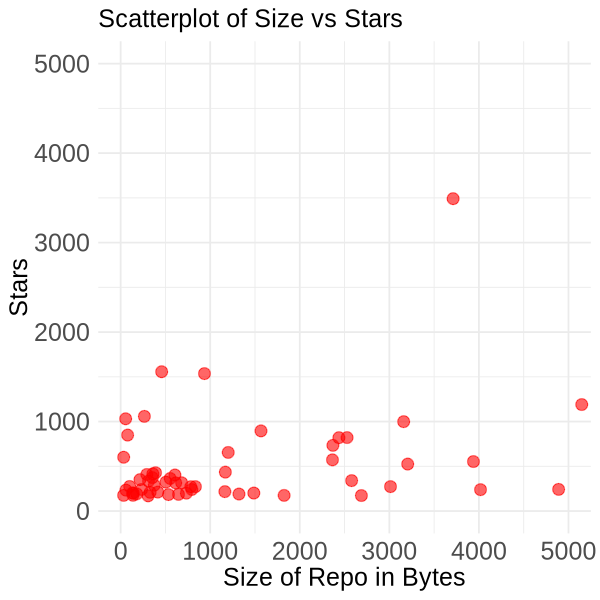

In [8]:
# Main developer: Matthew

options(repr.plot.width = 5, repr.plot.height = 5) 
size_plot <- ggplot(github_sample, aes(x = size, y = stars)) +
  geom_point(color = "red", alpha = 0.6, size = 3) +  
  labs(title = "Scatterplot of Size vs Stars",  
       x = "Size of Repo in Bytes",  
       y = "Stars") +  
    coord_cartesian(xlim = c(0, 5000), ylim = c(0, 5000)) +
  theme_minimal() +  
  theme(
    plot.title = element_text(size = 15),  
    axis.title = element_text(size = 15),    
    axis.text = element_text(size = 15)      
  )

size_plot

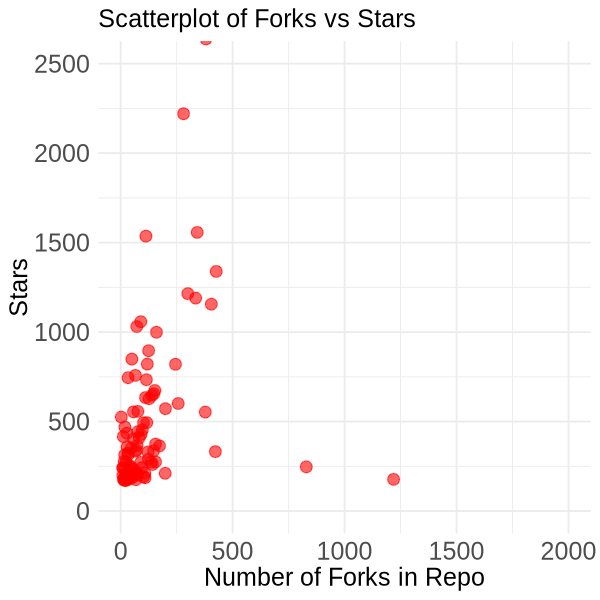

In [9]:
# Main developer: Matthew

options(repr.plot.width = 5, repr.plot.height = 5) 
forks_plot <- ggplot(github_sample, aes(x = forks, y = stars)) +
  geom_point(color = "red", alpha = 0.6, size = 3) +  
  labs(title = "Scatterplot of Forks vs Stars",  
       x = "Number of Forks in Repo",  
       y = "Stars") +  
    coord_cartesian(xlim = c(0, 2000), ylim = c(0, 2500)) +
  theme_minimal() +  
  theme(
    plot.title = element_text(size = 15),  
    axis.title = element_text(size = 15),    
    axis.text = element_text(size = 15)      
  )

forks_plot

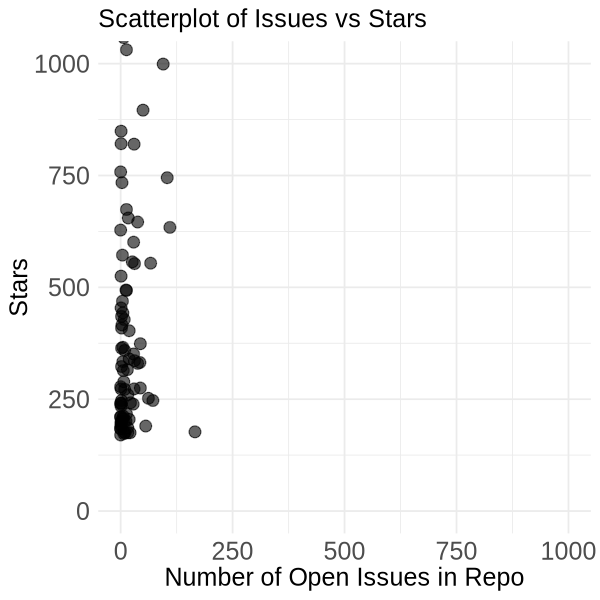

In [10]:
# Main developer: Matthew

options(repr.plot.width = 5, repr.plot.height = 5) 
issues_plot <- ggplot(github_sample, aes(x = issues, y = stars)) +
  geom_point(color = "black", alpha = 0.6, size = 3) +  
  labs(title = "Scatterplot of Issues vs Stars",  
       x = "Number of Open Issues in Repo",  
       y = "Stars") +  
  theme_minimal() +  
    coord_cartesian(xlim = c(0, 1000), ylim = c(0, 1000)) +
  theme(
    plot.title = element_text(size = 15),  
    axis.title = element_text(size = 15),    
    axis.text = element_text(size = 15)      
  )

issues_plot

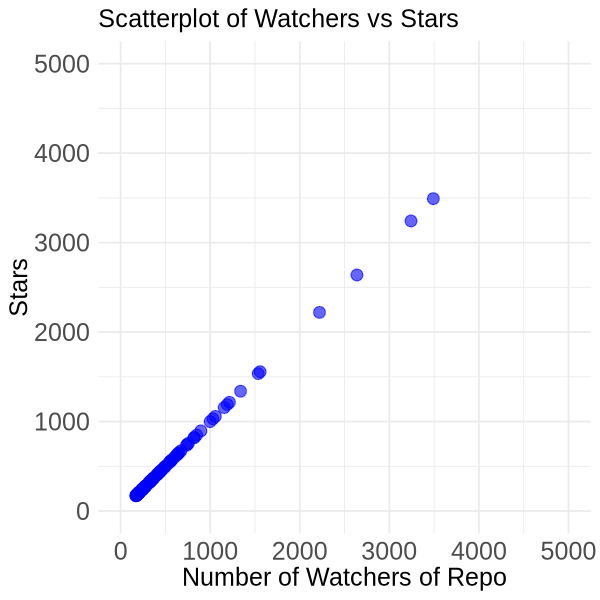

In [11]:
# Main developer: Matthew

options(repr.plot.width = 5, repr.plot.height = 5) 
watchers_plot <- ggplot(github_sample, aes(x = watchers, y = stars)) +
  geom_point(color = "blue", alpha = 0.6, size = 3) +  
  labs(title = "Scatterplot of Watchers vs Stars",  
       x = "Number of Watchers of Repo",  
       y = "Stars") +  
  theme_minimal() +  
    coord_cartesian(xlim = c(0, 5000), ylim = c(0, 5000)) +
  theme(
    plot.title = element_text(size = 15),  
    axis.title = element_text(size = 15),    
    axis.text = element_text(size = 15)      
  )

watchers_plot

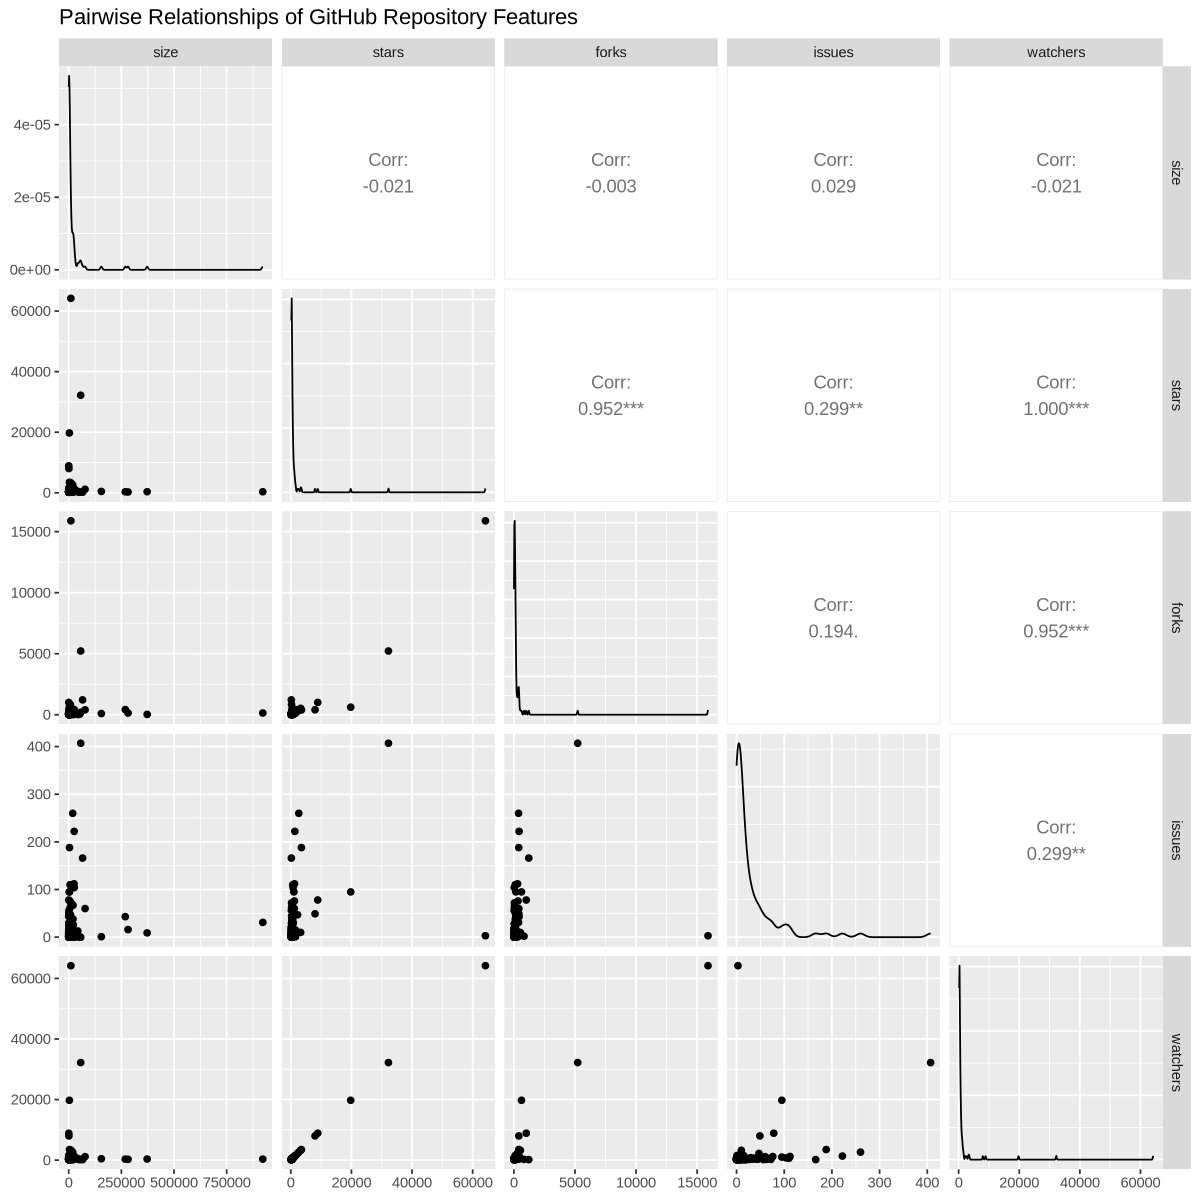

In [12]:
# Main developer: Shaleen

options(repr.plot.width = 10, repr.plot.height = 10)  

ggpairs(
  github_sample,
  columns = c("size", "stars", "forks", "issues", "watchers"),
  title = "Pairwise Relationships of GitHub Repository Features"
)

The main purpose of the scatterplots is to identify possible relationships between the Stars variable and other continuous variables. We can see a strong positive relationship between Watchers and Stars, along with a weaker, but positive relationship between Forks and Stars. For the Forks and Stars plot, we can see a large concentration of observations closer to the origin, possibly indicating a larger subset of repositories have a small amount of stars and small amount of forks. These both are what we expect, as more watchers and more forks can increase exposure to a repository, increasing the possibility of recieving stars. Furthermore, we can see a weak and positive relationship between Issues and Stars. This is somewhat unexpected, as users may be less likely to interact with a repository if the number of issues hinders the use of the repository. Lastly, we see minimal correlation between Size and Stars, perhaps indicating the possible omission of Size from our future created model as we will be using a linear model. The ggpairs plot is used to visualize pairwise relationships between variables in a dataset, combining scatter plots, correlation coefficients, and distributions into one view. It helps identify trends, correlations, and patterns, providing a quick overview of how variables interact. In this case, the plot explores metrics like size, stars, forks, issues, and watchers for GitHub repositories to uncover meaningful relationships or insights that can guide further analysis or decision-making

#### Correlation Heatmap

To explore the problem of multicollinearity, we will focus on the numerical variables in the dataset. We will use a correlation matrix heatmap to assess if multicolinearity exists.

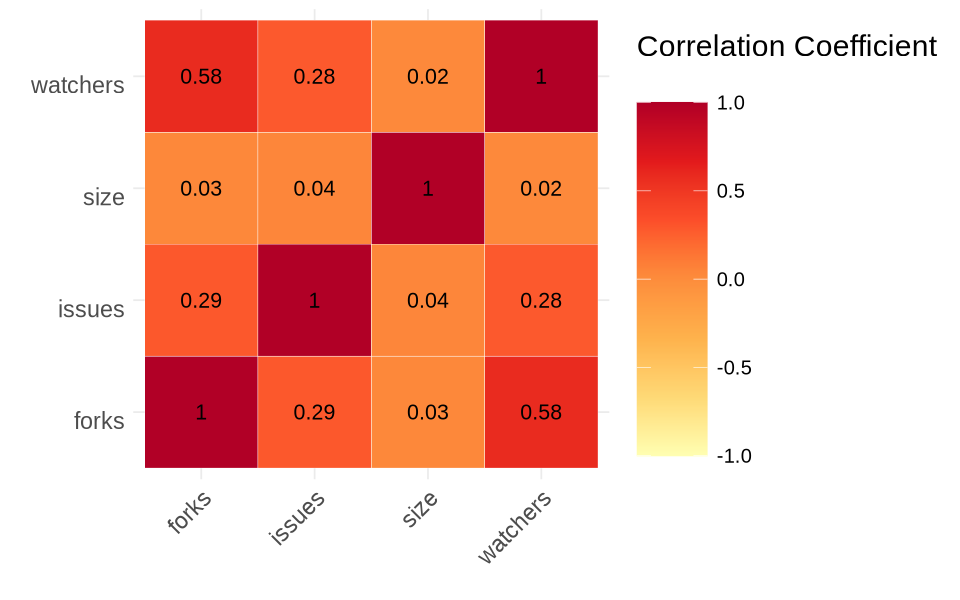

In [13]:
# Main developer: Erhan

options(repr.plot.width = 8, repr.plot.height = 5) 

github_numerical_df <- github_data_clean %>%
  select(size, watchers, forks, issues)

corr_matrix <- 
    github_numerical_df %>%  
    cor() %>%
    as_tibble(rownames = 'var1') %>%
    pivot_longer(-var1, names_to = "var2", values_to = "corr")

plot_corr_matrix <- 
    corr_matrix %>%
    ggplot(aes(var1, var2)) +
    geom_tile(aes(fill = corr), color = "white") +
    scale_fill_distiller("Correlation Coefficient \n",
                         palette = "YlOrRd",
                         direction = 1, 
                         limits = c(-1, 1)
    ) +
    labs(x = "", y = "") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
        axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 12),
        legend.key.size = unit(1.5, "cm")
    ) +
    geom_text(aes(var2, var1, label = round(corr, 2)), color = "black", size = 4.5)

plot_corr_matrix

### Implementation of methods

A reminder of our proposed question: **Which explanatory variables best predict stars on a GitHub repository?** 

To answer this question, we will use LASSO regression, which naturally performs feature selection. We will then train a multiple linear regessor with selected predictors and evaluate our model using RMSE and adjusted $R^2$.  

To conduct this analysis, we will use 10-fold cross validation to tune the best value of $\lambda$, a hyperparameter of LASSO for regularization, and a training-testing split to ensure our model doesn't suffer from post-inference problems such as inflated Type I error. 

Because LASSO regression is biased estimator, it is known that the coefficients in regression produced by LASSO do not lay at the center of the true sampling distribution of the explanatory variable's coefficients. Effectively, LASSO can only be used as a variable selection method and not for inference. This is a weakness of our method called post-LASSO error. To correct this error, we will use LASSO only for variable selection and use multiple linear regression as our model for prediction following the variable selection process.

In order to use this method, we need to scale all numeric variables in our data set, as the coefficients associated with each variable in the context of LASSO regression are dependent upon their scale: a variable on a much larger scale than others will have a diminished coefficient not representative of its relative importance for prediction. 

The assumptions necessary for using these methods are:
- Each explanatory variable affects the response variable independently from the others, i.e. no multicollinearity
- Each explanantory variable is linearly related to the response variable
- Each measurement from each explanatory variable is independent from the others (satisfied in this case, as each observation pertains to a different GitHub repo)
- Our sample size, $n$, is large enough so that the error terms of the explanatory variables are normally-distributed
- The variance of error of each explanatory variable is equal among observations, i.e. no heteroscedasticity
- The numeric variables in the data set are scaled

In [14]:
# Main developer: Chloe

# scaling numeric features

numeric_cols <- sapply(github_data_clean, is.numeric)

github_data_clean[numeric_cols] <- scale(github_data_clean[numeric_cols])

head(github_data_clean)

size,stars,forks,issues,watchers,has_issues,has_projects,has_downloads,has_wiki,has_pages,has_discussions,is_fork,is_archived,is_template
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,<fct>
0.47432990,93.41788,26.84285,1.06903622,93.41788,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
-0.05295532,74.46148,45.82565,0.04109144,74.46148,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
-0.07523044,67.34891,21.11945,0.11742398,67.34891,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
0.19008643,66.82391,17.10648,84.85162450,66.82391,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
-0.04738725,66.13760,55.67305,0.09197980,66.13760,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
-0.07003823,63.99702,23.34719,0.77897260,63.99702,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


#### Training/testing split

Below, we split the data twice. On the first split, we make a 70-30 split into training and testing data. Then, we take the training data and split it into 70% training and 30% validation. We will use the training data to tune $\lambda$, a hyper-parameter of LASSO, and the validation set for the feature selection by LASSO regression once $\lambda$ is tuned.

In [15]:
# Main developer: Chloe
# Other contributors: Everyone (debugged)

set.seed(1234)

# intital split into testing and training data

repo_split <- initial_split(github_data_clean, prop = 0.7, strata = stars)
training_repos <- training(repo_split)
testing_repos <- testing(repo_split)

In [16]:
# Main developer: Chloe
# Other contributors: Everyone (debugged)

set.seed(1234)

# splitting training data into training and validation

repo_split <- initial_split(training_repos, prop = 0.7, strata = stars)
training_repos <- training(repo_split)
validation_repos <- testing(repo_split)

In [17]:
# Main developer: Chloe
# Other contributors: Everyone (debugged)

# splitting the data into explanatory variables, X, and response, Y, to tune lambda

training_Y <- training_repos |>
            select(stars) |>
            as.matrix()

training_X <- training_repos |>
        select(-stars) |>
            as.matrix()

validation_Y <- validation_repos |>
            select(stars) |>
            as.matrix()

validation_X <- validation_repos |>
        select(-stars) |>
            as.matrix()

testing_Y <- testing_repos |>
            select(stars) |>
            as.matrix()

testing_X <- testing_repos |>
        select(-stars) |>
            as.matrix()

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

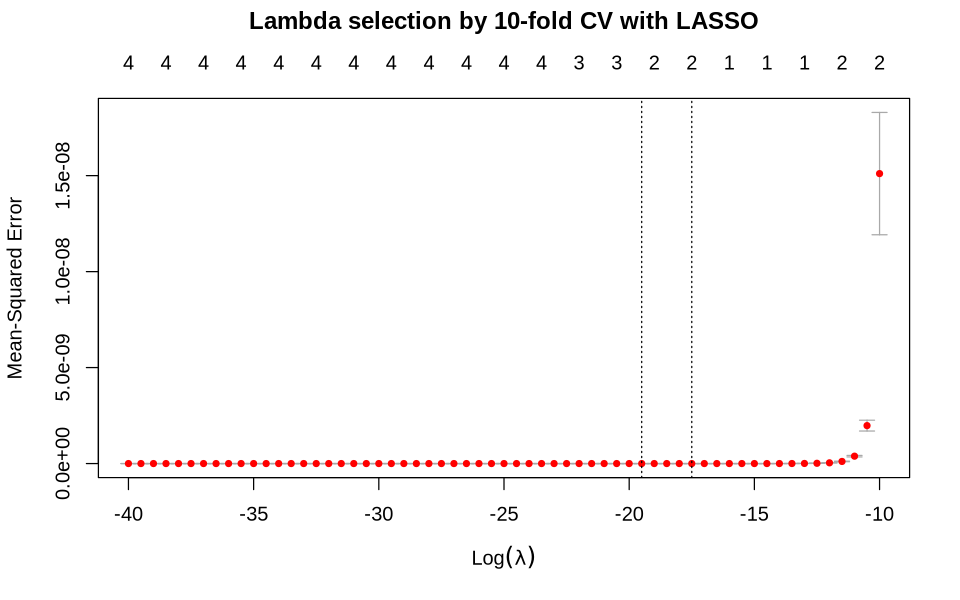

In [18]:
# Main developer: Chloe

# fitting the LASSO regression, running 10-fold cross-validation, and plotting resulting MSE against lambda
repos_cv_LASSO <- cv.glmnet(
  x = training_X, y = training_Y,
  alpha = 1,
  lambda = exp(seq(-40, -10, 0.5))
)

plot(repos_cv_LASSO, main = "Lambda selection by 10-fold CV with LASSO\n\n")

In [19]:
# Main developer: Chloe

# finding best value of lamda as per minimized MSE

repos_lambda_min <- (repos_cv_LASSO$lambda.min)

print(repos_lambda_min)
print(log(repos_lambda_min))

[1] 3.398268e-09
[1] -19.5


As we see, MSE is minimized where $\log(\lambda)=-19.5$, where the model has selected only two variables for prediction. Below, we see what this model is.

In [20]:
# Main developer: Chloe

# training tuned LASSO model on the test set

repo_LASSO_model_tuned <- glmnet(
  x = validation_X, y = validation_Y, 
  alpha = 1,
  lambda = repos_lambda_min)

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”


In [21]:
# Main developer: Chloe

# extracting selected coefficients for each explanatory variable from trained LASSO model
results <- tibble(
    variable = rownames(as.matrix(coef(repo_LASSO_model_tuned))),
    coefficient = as.matrix(coef(repo_LASSO_model_tuned))[, 1])

results |>
    arrange(desc(coefficient))

variable,coefficient
<chr>,<dbl>
watchers,9.999592e-01
forks,5.806123e-05
issues,1.067063e-05
has_issues,0.000000e+00
has_projects,0.000000e+00
has_downloads,0.000000e+00
has_wiki,0.000000e+00
has_pages,0.000000e+00
has_discussions,0.000000e+00


In [22]:
# Main developer: Chloe and Matthew

set.seed(20211118) # do not change this

beta_lasso <- coef(repo_LASSO_model_tuned, s = 'lambda.min')

beta_lasso

14 x 1 sparse Matrix of class "dgCMatrix"
                           s1
(Intercept)     -3.018517e-07
size            -2.381045e-06
forks            5.806123e-05
issues           1.067063e-05
watchers         9.999592e-01
has_issues       .           
has_projects     .           
has_downloads    .           
has_wiki         .           
has_pages        .           
has_discussions  .           
is_fork          .           
is_archived      .           
is_template      .           

As above, LASSO regression selected ``size``, ``forks``, ``issues``, and ``watchers`` as the strongest predictors of ``stars``. We will use these predictors in our multiple linear regression, as shown below.

In [23]:
# Main developer: Chloe
# Other contributors: Everyone (debugged)

training_data_selected <- training_repos |>
                select(size, forks, issues, stars, watchers)

In [24]:
# Main developer: Chloe
# Other contributors: Everyone (debugged)

mlr_repos <- lm(stars ~ ., training_data_selected)

Here, we select only the variables found useful for prediction by LASSO and use the original training set (before the validation split) to train the multiple linear regression model. Below, we edit our testing data to only contain the variables found useful for prediction once again by our prior LASSO analysis.

In [25]:
# Main developer: Chloe, Matthew, Shaleen

testing_X <- as.data.frame(testing_X) |>
                    select(size, forks, issues, watchers)

In [26]:
# Main developer: Chloe, Matthew, Shaleen

# the above operation changed all numeric columns to chr type columns so we had to convert them back to continue with the analyis

testing_X$size <- as.numeric(testing_X$size)
testing_X$forks <- as.numeric(testing_X$forks)
testing_X$issues <- as.numeric(testing_X$issues)
testing_X$watchers <- as.numeric(testing_X$watchers)

Here, we make predictions on our testing data using the MLR model we trained using LASSO feature selection.

In [27]:
# Main developer: Chloe & Matthew
# Other contributors: Everyone (debugged)

repo_mlr_preds <- predict(mlr_repos,
  newdata = testing_X)

In [28]:
# Main developer: Chloe

summary(mlr_repos)

Warning message in summary.lm(mlr_repos):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = stars ~ ., data = training_data_selected)

Residuals:
       Min         1Q     Median         3Q        Max 
-8.869e-15 -2.900e-18 -1.100e-18  5.000e-18  2.705e-15 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -1.445e-18  1.631e-19 -8.855e+00   <2e-16 ***
size         3.337e-18  1.453e-19  2.296e+01   <2e-16 ***
forks       -2.124e-16  3.109e-19 -6.834e+02   <2e-16 ***
issues      -2.551e-17  1.911e-19 -1.334e+02   <2e-16 ***
watchers     1.000e+00  2.340e-19  4.273e+18   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.295e-17 on 105356 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.042e+37 on 4 and 105356 DF,  p-value: < 2.2e-16


In [30]:
# Main developer: Chloe, Matthew, Shaleen

# calculating adjusted r-squared to evaluate our model objectively

r_squared <- summary(mlr_repos)$r.squared

n <- nrow(training_data_selected)

p <- length(mlr_repos$coefficients) - 1 

adjusted_r_squared <- 1 - ((1 - r_squared) * (n - 1)) / (n - p - 1)

Warning message in summary.lm(mlr_repos):
“essentially perfect fit: summary may be unreliable”


In [31]:
# Main developer: Chloe & Matthew

fat_R_MSE_models <- tibble(
    Model = "ML Regression with LASSO variable selection",
    R_MSE = sqrt(mean((repo_mlr_preds - testing_Y)^2)),
    Adj_R_Squared = r_squared)
fat_R_MSE_models

Model,R_MSE,Adj_R_Squared
<chr>,<dbl>,<dbl>
ML Regression with LASSO variable selection,1.122105e-07,1


In the above, we find 100% of the variation in the response variable, ``stars``, can be explained by our model. Essentially, we have achieved a perfect fit here. This is suspicious to us, however.

Because ``watchers`` is perfectly correlated with ``stars`` in our data set, we suspect that there may a confounding variable affecting our model. For the purpose of exploration, we will remove ``watchers`` as a predictor and run the analysis one more time to see how this affects the LASSO variable selection.

In [32]:
# Main developer: Chloe, Matthew, Shaleen

github_data_clean_no_watch <- github_data_clean |>
                    select(-watchers)

In [33]:
# Main developer: Chloe
# Other contributors: Everyone (debugged)

set.seed(1234)

# making the same testing/training split as before

repo_split_no_watch <- initial_split(github_data_clean_no_watch, prop = 0.7, strata = stars)
training_repos <- training(repo_split_no_watch)
testing_repos <- testing(repo_split_no_watch)

In [34]:
# Main developer: Chloe
# Other contributors: Everyone (debugged)

set.seed(1234)

# and the same training/validation split as before

repo_split_train_no_watch <- initial_split(training_repos, prop = 0.7, strata = stars)
training_repos <- training(repo_split_train_no_watch)
validation_repos <- testing(repo_split_train_no_watch)

In [35]:
# Main developer: Chloe
# Other contributors: Everyone (debugged)

# splitting the data into explanatory variables, X, and response, Y

training_Y_no_watch <- training_repos |>
            select(stars) |>
            as.matrix()

training_X_no_watch <- training_repos |>
        select(-stars) |>
            as.matrix()

validation_Y_no_watch <- validation_repos |>
            select(stars) |>
            as.matrix()

validation_X_no_watch <- validation_repos |>
        select(-stars) |>
            as.matrix()

testing_Y_no_watch <- testing_repos |>
            select(stars) |>
            as.matrix()

testing_X_no_watch <- testing_repos |>
        select(-stars) |>
            as.matrix()

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

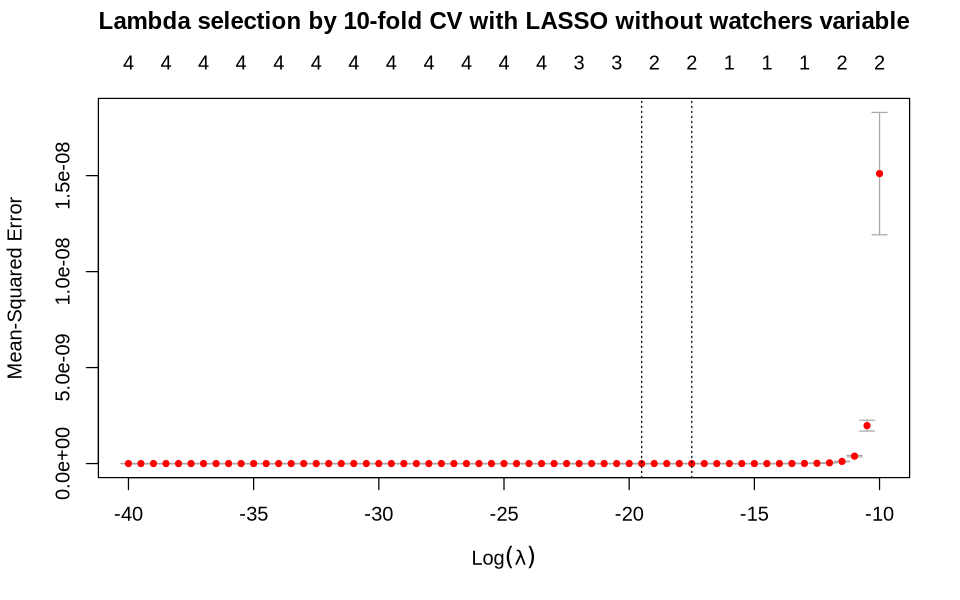

In [36]:
# Main developer: Chloe

# fitting the LASSO regression, running 10-fold cross-validation, and plotting resulting MSE against lambda without the variable watchers

repos_cv_LASSO_no_watch <- cv.glmnet(
  x = training_X_no_watch, y = training_Y_no_watch,
  alpha = 1,
  lambda = exp(seq(-40, -10, 0.5))
)

plot(repos_cv_LASSO, main = "Lambda selection by 10-fold CV with LASSO without watchers variable\n\n")

In [37]:
# Main developer: Chloe

# finding best value of lamda as per minimized MSE

repos_lambda_min_no_watch <- (repos_cv_LASSO$lambda.min)

print(repos_lambda_min)
print(log(repos_lambda_min))

[1] 3.398268e-09
[1] -19.5


Without ``watchers`` included in the dataset, we find the minimal squared error where $\log(\lambda)=-19.5$ once again.

In [38]:
# Main developer: Chloe & Matthew
# Other contributors: Everyone (debugged)

# training tuned LASSO model on the test set

repo_LASSO_model_tuned_no_watch <- glmnet(
  x = validation_X_no_watch, y = validation_Y_no_watch, 
  alpha = 1,
  lambda = repos_lambda_min_no_watch)

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”


In [39]:
# Main developer: Chloe and Matthew

set.seed(20211118) # do not change this

beta_lasso_no_watch <- coef(repo_LASSO_model_tuned_no_watch, s = 'lambda.min')

beta_lasso_no_watch

13 x 1 sparse Matrix of class "dgCMatrix"
                          s1
(Intercept)     -0.002352270
size             0.004062159
forks            0.648140110
issues           0.102570609
has_issues       .          
has_projects     .          
has_downloads    .          
has_wiki         .          
has_pages        .          
has_discussions  .          
is_fork          .          
is_archived      .          
is_template      .          

LASSO regression selected the following predictors ``size``, ``forks``, and ``issues``. We will now make a multiple linear regression model using the variables selected by LASSO to avoid post-LASSO error.

In [40]:
# Main developer: Chloe
# Other contributors: Everyone (debugged)

githup_repo_selected_no_watch <- github_data_clean |>
                select(size, forks, issues, stars)

In [41]:
# Main developer: Chloe
# Other contributors: Everyone (debugged)

mlr_repos <- lm(stars ~ ., githup_repo_selected_no_watch)

In [42]:
# Main developer: Chloe & Matthew
# Other contributors: Everyone (debugged)

# removing unselected variables from testing data so we can test our MLR on this data

testing_X_no_watch <- as.data.frame(testing_X_no_watch) |>
                    select(size, forks, issues)

In [43]:
# Main developer: Chloe & Matthew
# Other contributors: Everyone (debugged)

# again, the above operation converted all numeric types to character types so we must convert them back

testing_X_no_watch$size <- as.numeric(testing_X_no_watch$size)
testing_X_no_watch$forks <- as.numeric(testing_X_no_watch$forks)
testing_X_no_watch$issues <- as.numeric(testing_X_no_watch$issues)

In [44]:
# Main developer: Chloe
# Other contributors: Everyone (debugged)

repo_mlr_preds_no_watch <- predict(mlr_repos,
  newdata = testing_X_no_watch)

In [47]:
# Main developer: Chloe, Matthew, Shaleen

# calculating adjusted R-squared on our new model

r_squared <- summary(mlr_repos)$r.squared

n <- nrow(training_data_selected)

p <- length(mlr_repos$coefficients) - 1

adjusted_r_squared <- 1 - ((1 - r_squared) * (n - 1)) / (n - p - 1)

In [48]:
# Main developer: Chloe & Matthew

fat_R_MSE_models_no_watch <- tibble(
    Model = "ML Regression with LASSO variable selection",
    R_MSE = sqrt(mean((repo_mlr_preds_no_watch - testing_Y_no_watch)^2)),
    Adj_R_Squared = r_squared)
fat_R_MSE_models_no_watch

Model,R_MSE,Adj_R_Squared
<chr>,<dbl>,<dbl>
ML Regression with LASSO variable selection,0.8988952,0.3543475


### Summary of Methods Used

#### Data Exploration and Preparation
The first step involved cleaning and wrangling the dataset to prepare it for analysis. Metadata columns like `name`, `description`, and `url` were removed since they are not directly predictive of popularity. Categorical variables, such as `has_issues` and `is_archived`, were converted into factors to enable statistical modeling.

Exploratory data analysis (EDA) was conducted to examine relationships between predictors and the response variable (`stars`). Scatterplots revealed clear positive correlations between `stars` and variables like `forks` and `watchers`. However, variables like `size` showed weaker associations. A correlation heatmap was generated to identify multicollinearity among numeric variables, which can bias regression coefficients.

#### Feature Selection Using LASSO Regression
To identify the most predictive variables, LASSO regression was employed. This method is effective for feature selection as it shrinks less relevant coefficients to zero while retaining those with strong predictive power. A 10-fold cross-validation process was used to determine the optimal penalty parameter (λ). The initial analysis included all predictors, but the variable `watchers` was found to be perfectly correlated with `stars`. This strong multicollinearity suggested that `watchers` might distort the model’s predictions by the presence of a confounding variable, leading to potential overfitting.

To address this, the analysis was repeated after excluding `watchers`. The LASSO model identified `forks`, `issues`, and `size` as the most relevant predictors for the number of stars a repository receives.

#### Predictive Modeling
Following the LASSO regression, a multiple linear regression (MLR) model was fitted using the selected predictors (`forks`, `issues`, and `size`). Scaling was applied to all numeric variables before modeling to ensure comparability of coefficients. The dataset was split into training (70%), and testing (30%) sets to evaluate the model’s performance and avoid overfitting. 

The performance of the final MLR model was assessed using root mean square error (RMSE) and adjusted $R^2$. When `watchers` was included in the dataset, the adjusted $R^2$ was very high, suggesting overfitting. However, after excluding `watchers`, the model achieved an RMSE of approximately 0.899 and an adjusted $R^2$ of 0.354 on the testing data. These results indicate moderate predictive power and a better balance between bias and variance.

### Discussion

#### Key Findings
The analysis revealed that variables such as `forks` and `issues` are positively associated with repository popularity (`stars`). Repositories with a higher number of forks likely gain more exposure, making them more accessible to potential users and contributors. Similarly, the number of issues might reflect active development and user engagement, attracting more stars. However, `size`, which measures the repository’s storage in bytes, showed only a weak relationship with `stars`, likely indicating that the sheer size of a repository does not significantly influence its popularity.

When `watchers` was included as a predictor, the model’s perfect adjusted $R^2$ and extremely low RMSE hinted at possible overfitting, emphasizing the need for careful feature selection to improve generalizability. We decided to experiment with removing `watchers` to provide a more realistic assessment of other predictors’ contributions. Our analysis shows ``watchers`` proves to be a strong predictor of ``stars`` in the context of the other predictors, although we cannot assume a causal relationship, as we suspect a confounding factor may be affecting this perfect relationship between ``watchers`` and ``stars``.

#### Model Limitations
Despite its moderate success, the model has some limitations. Multicollinearity among predictors, even after removing `watchers`, may still affect the reliability of coefficient estimates. Additionally, the linear model assumes that the relationships between predictors and the response variable are linear, which may not always hold true in complex real-world data.

The  $R^2$ of 0.354 in the model without `watchers` suggests that a significant proportion of the variation in `stars` remains unexplained, and the RMSE of 0.899 is a underwhelming since the units of our response variable is stars (count). This highlights the potential influence of unmeasured factors, such as the repository owner’s reputation, external promotions, or the quality of documentation, none of which were included in the dataset.

#### Recommendations for Improvement
To improve the model, incorporating nonlinear relationships or interaction terms (e.g., between `forks` and `issues`) could capture more nuanced patterns. Additionally, using advanced machine learning techniques such as Random Forests or Gradient Boosted Machines might yield better predictive performance by accounting for complex interactions and nonlinearity.

Another approach would be to expand the dataset by including additional explanatory variables. For instance, measures of community engagement, such as the number of pull requests or the frequency of commits, could provide deeper insights into repository activity and popularity.

#### Future Directions
This study lays the groundwork for exploring repository popularity, but several avenues for future research remain. First, investigating causal relationships between repository attributes and stars could provide actionable insights for developers. Second, segmenting repositories by programming language or domain could reveal differences in popularity drivers. Lastly, a longitudinal analysis examining how repository characteristics evolve over time could uncover trends influencing popularity dynamics.

### Conclusion
This study demonstrates that attributes such as `forks`, `issues`, and `size` contribute to the popularity of GitHub repositories, as measured by the number of stars. By employing LASSO regression for feature selection and multiple linear regression for inference, the analysis identified key predictors while addressing multicollinearity and overfitting issues. Although the model has moderate predictive power, there is significant scope for improvement through the inclusion of additional variables and the adoption of more sophisticated modeling techniques. These findings not only shed light on the factors influencing repository popularity but also provide a foundation for future research aimed at better understanding and predicting success on GitHub.


### References

Borges, Hudson, and Marco Tulio Valente. “What’s in a GitHub Star? Understanding Repository Starring Practices in a Social Coding Platform.” Journal of Systems and Software, vol. 146, Dec. 2018, pp. 112–129, www.sciencedirect.com/science/article/pii/S0164121218301961, https://doi.org/10.1016/j.jss.2018.09.016. Accessed 4 Nov. 2019.

Moid, Mohammed Abdul, et al. “Predicting Stars on Open-Source GitHub Projects.” 2022 Smart Technologies, Communication and Robotics (STCR), 9 Oct. 2021, ieeexplore.ieee.org/document/9588891, https://doi.org/10.1109/stcr51658.2021.9588891. Accessed 5 Dec. 2024.